# Ames (Iowa) housing regression

We'd like to know:

* What are the main drivers of the target (SalePrice)?
* What features might be good for Iowa USA but not for London, UK?
* Which features might translate but due to differences in culture might make less sense in a demo for London?
* Are there any outliers? Should we dig further into them?
* Do we have missing data?
* Do we trust this dataset?

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import dabl

print(f"Pandas {pd.__version__} version")
import pandas_profiling
print(f"Pandas Profiling {pandas_profiling.__version__} version")

import seaborn as sns
sns.set(style="white")
import altair as alt
alt.renderers.enable('html')

from utility import mpl_set_label_rotation

/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Pandas 1.3.5 version
Pandas Profiling 3.1.0 version


In [2]:
# https://www.kaggle.com/prevek18/ames-housing-dataset/data
df = pd.read_csv('ames_housing.csv')
df.columns = [c.replace(' ', '_') for c in df.columns]

# note good vis and explanation here
# https://www.kaggle.com/ammar111/house-price-prediction-an-end-to-end-ml-project
df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS_SubClass      2930 non-null   int64  
 3   MS_Zoning        2930 non-null   object 
 4   Lot_Frontage     2440 non-null   float64
 5   Lot_Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2930 non-null   object 
 9   Land_Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot_Config       2930 non-null   object 
 12  Land_Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition_1      2930 non-null   object 
 15  Condition_2      2930 non-null   object 
 16  Bldg_Type        2930 non-null   object 
 17  House_Style   

# First review with Pandas Profiling

In [5]:
profile = ProfileReport(df.sample(200), minimal=True) # small sample else it takes ages with many variables
# profile.to_file(output_file="ames_housing_univariate_report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Dabl

It needs a regression target...

Target looks like regression
Showing only top 10 of 26 continuous features


/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column SalePrice.
  warn("Dropped {} outliers in column {}.".format(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 3 outliers in column Gr_Liv_Area.
  warn("Dropped {} outliers in column {}.".format(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Garage_Cars.
  warn("Dropped {} outliers in column {}.".format(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column Total_Bsmt_SF.
  warn("Dropped {} outliers in column {}.".format(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 4 outliers in column 1st_Flr_SF.
  warn("Dropped {} outliers in column {}.".format(
/home/ian/miniconda3/envs/course/lib/pyth

Showing only top 10 of 41 categorical features


/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/home/ian/miniconda3/envs/course/lib/python3.10/site-packages/dabl/plot/utils.py:374:

[array([[<AxesSubplot:title={'center':'F=5.27E+03'}, xlabel='Overall_Qual', ylabel='SalePrice'>,
         <AxesSubplot:title={'center':'F=2.79E+03'}, xlabel='Gr_Liv_Area'>,
         <AxesSubplot:title={'center':'F=2.16E+03'}, xlabel='Garage_Cars'>,
         <AxesSubplot:title={'center':'F=2.08E+03'}, xlabel='Garage_Area'>,
         <AxesSubplot:title={'center':'F=1.93E+03'}, xlabel='Total_Bsmt_SF'>],
        [<AxesSubplot:title={'center':'F=1.82E+03'}, xlabel='1st_Flr_SF', ylabel='SalePrice'>,
         <AxesSubplot:title={'center':'F=1.37E+03'}, xlabel='Year_Built'>,
         <AxesSubplot:title={'center':'F=1.20E+03'}, xlabel='Year_Remod/Add'>,
         <AxesSubplot:title={'center':'F=1.06E+03'}, xlabel='Garage_Yr_Blt'>,
         <AxesSubplot:title={'center':'F=9.98E+02'}, xlabel='Mas_Vnr_Area'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.74E-01'}, xlabel='SalePrice', ylabel='MS_SubClass'>,
         <AxesSubplot:title={'center':'F=3.62E-01'}, xlabel='SalePrice',

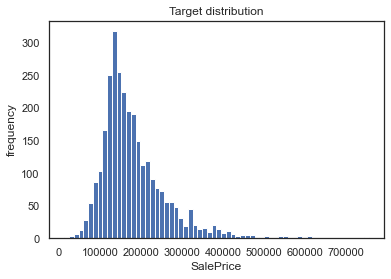

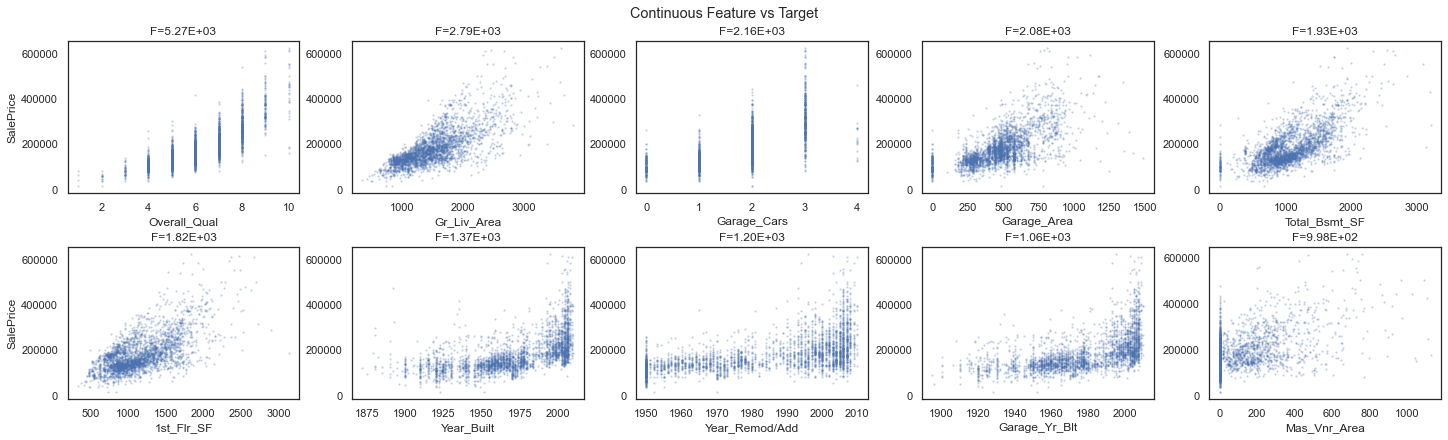

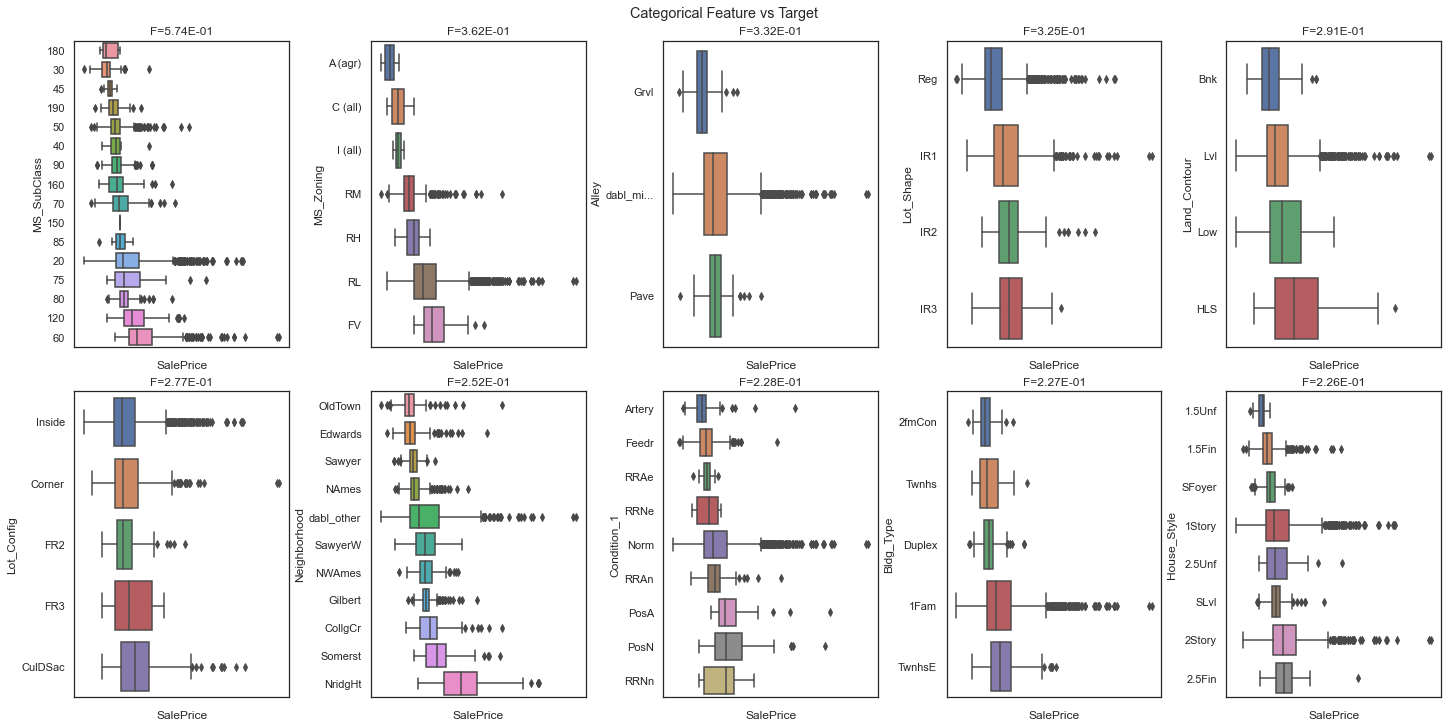

In [6]:
#TARGET = 'what_should_go_here?' # TODO

TARGET = 'SalePrice'
dabl.plot(df, target_col=TARGET)

# Show a relationship or two

In [ ]:
# find 1 or 2 dimensions that explain the SalePrice well
alt.Chart(df, title='Interactive data exploration').mark_circle(size=60).encode(
    x='SalePrice',
    y='Gr_Liv_Area',
    #color='Year_Built',
    color='Overall_Qual',
    # What else might go into the tool tips for debugging?
    tooltip=['Overall_Qual', 'Order']
).interactive()

## Do we have enough rows to support a sensible box plot?

Does quality change over time?

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df.query('Year_Built>1970'), x='Year_Built', y='Overall_Qual', ax=ax);
mpl_set_label_rotation(ax)

In [ ]:
# do a count plot here on the same dataset used above...

## Plot a Seaborn PairGrid

In [ ]:
cols = ['SalePrice', 'Overall_Qual', 'Gr_Liv_Area', 'Garage_Cars', 'Garage_Area', 
        'Total_Bsmt_SF', 'Year_Built', 'Garage_Yr_Blt']

# NOTE we take a sample as the pairgrid calculations can be slow
# NOTE we must dropna() else some of the pairgrid plots won't show
sample_for_pairgrid = df[cols].sample(1000).dropna()
# Fill in the PairGrid here 

In [ ]:
# the end of the Notebook - feel free to add more cells!